<a href="https://www.kaggle.com/code/parvezkamaly/telco-customer-churn-project-pk?scriptVersionId=297638318" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df['Churn'].value_counts(normalize='True')*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

**Visualize the data**

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

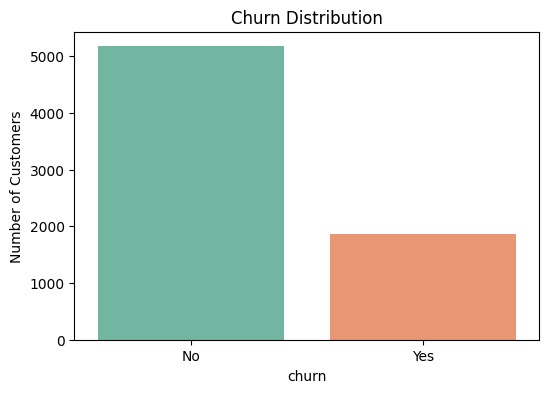

In [10]:
#count churn values
churn_counts=df['Churn'].value_counts()

#Plot 
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index,y=churn_counts.values,palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('churn')
plt.ylabel('Number of Customers')
plt.show()

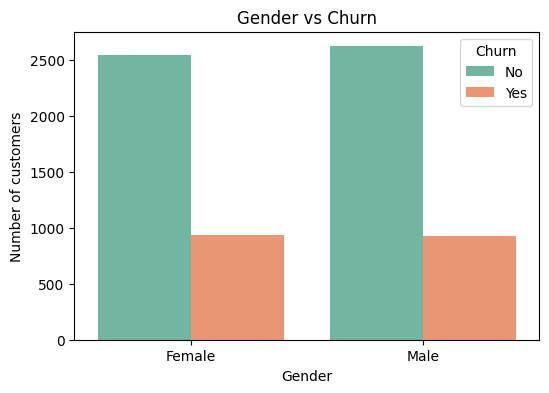

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='gender',hue='Churn',palette='Set2')
plt.title('Gender vs Churn')
plt.xlabel('Gender')
plt.ylabel('Number of customers')
plt.legend(title='Churn')
plt.show()

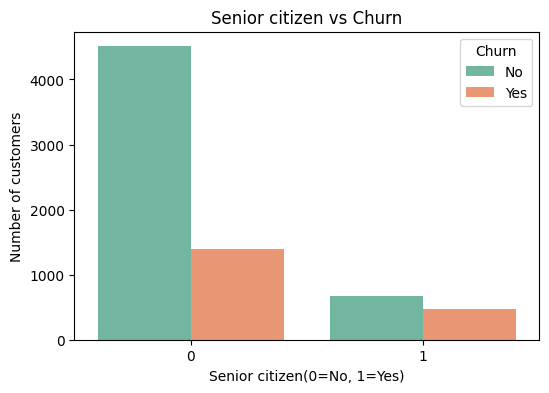

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='SeniorCitizen',hue='Churn',palette='Set2')
plt.title('Senior citizen vs Churn')
plt.xlabel('Senior citizen(0=No, 1=Yes)')
plt.ylabel('Number of customers')
plt.legend(title='Churn')
plt.show()

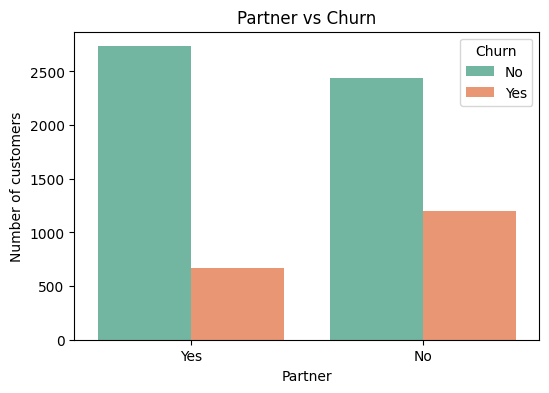

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Partner',hue='Churn',palette='Set2')
plt.title('Partner vs Churn')
plt.xlabel('Partner')
plt.ylabel('Number of customers')
plt.legend(title='Churn')
plt.show()

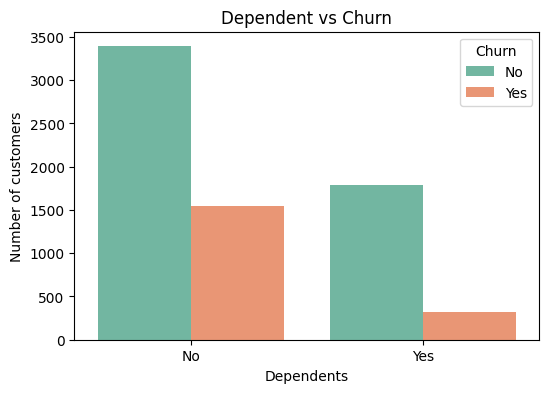

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Dependents',hue='Churn',palette='Set2')
plt.title('Dependent vs Churn')
plt.xlabel('Dependents')
plt.ylabel('Number of customers')
plt.legend(title='Churn')
plt.show()


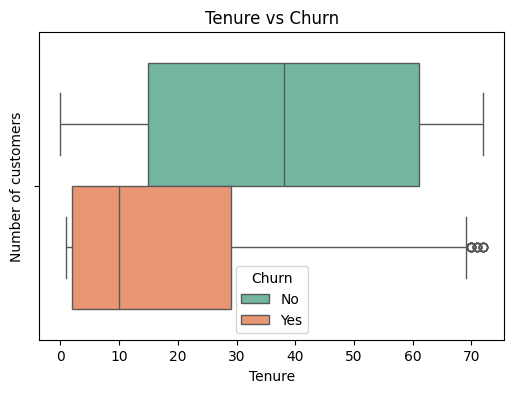

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='tenure',hue='Churn',palette='Set2')
plt.title('Tenure vs Churn')
plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.legend(title='Churn')
plt.show()

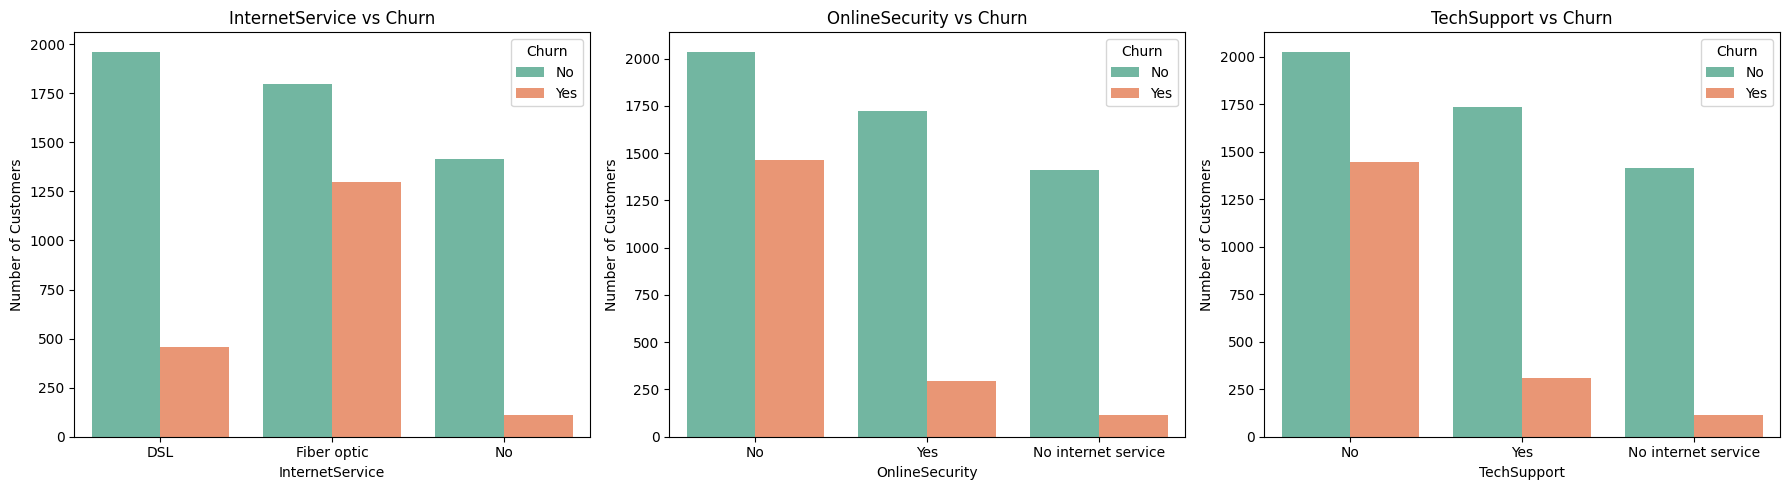

In [16]:
# Columns to plot
cols = ['InternetService', 'OnlineSecurity', 'TechSupport']

plt.figure(figsize=(18,5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.legend(title='Churn')

plt.tight_layout()
plt.show()

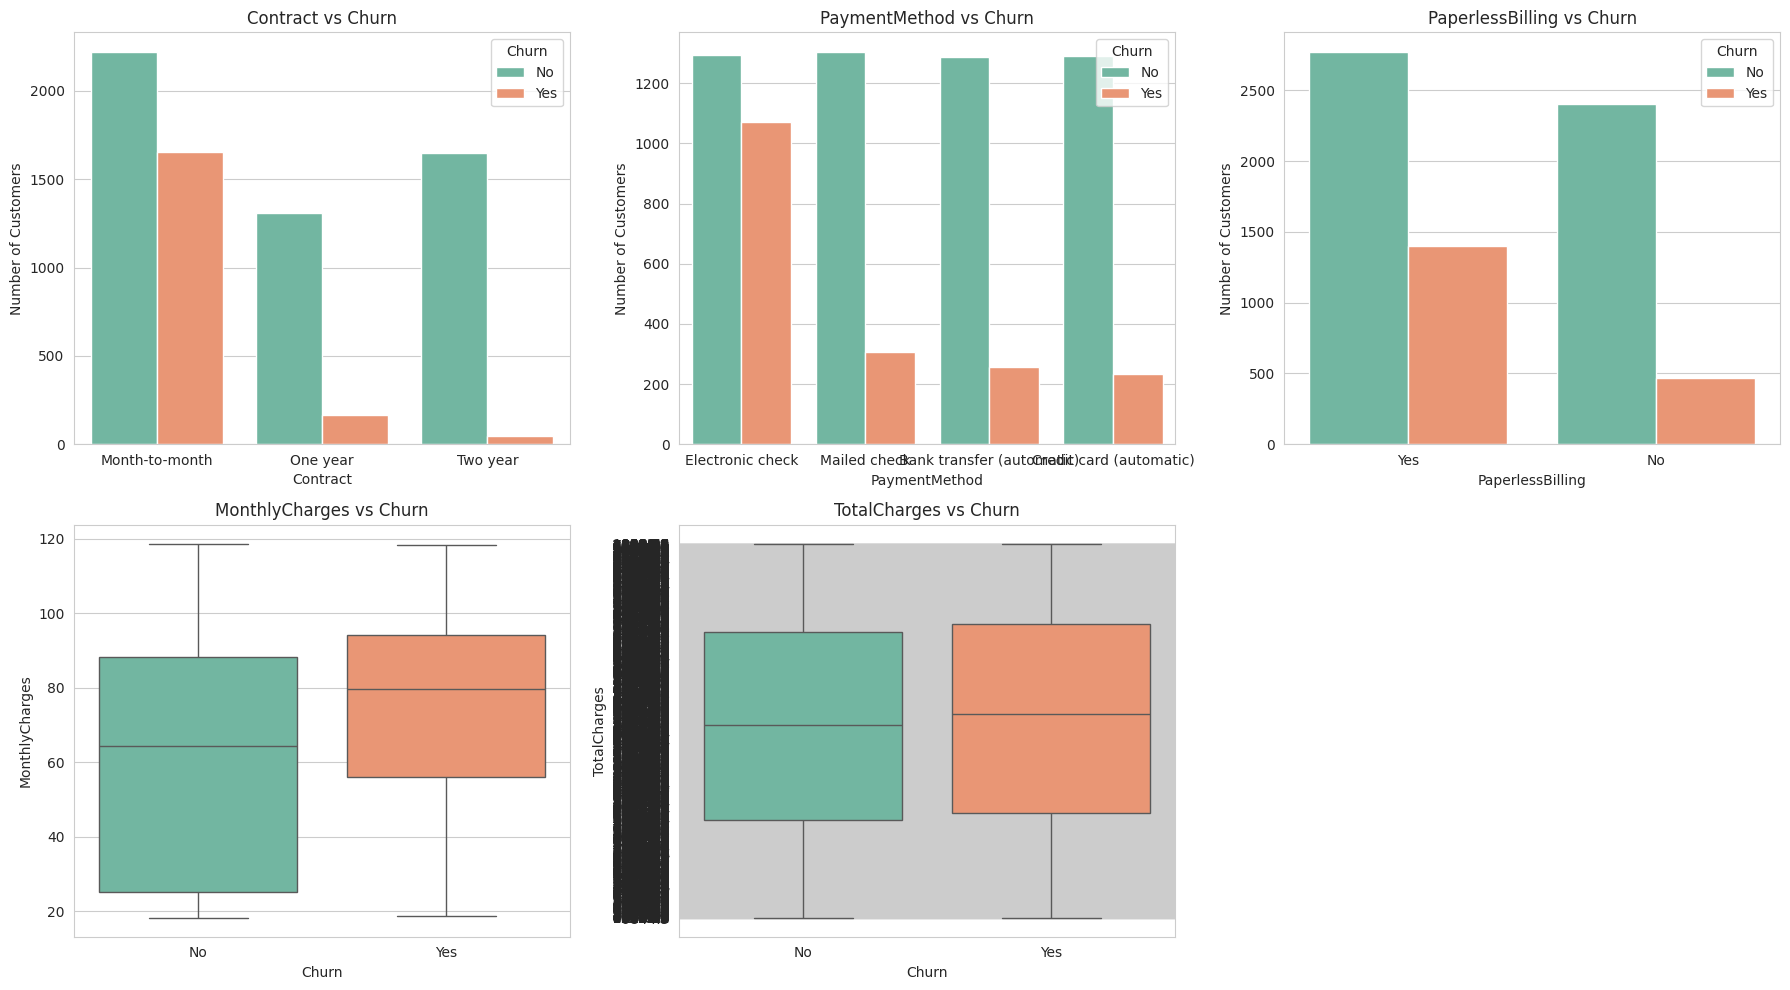

In [17]:

sns.set_style("whitegrid")

cat_cols = ['Contract', 'PaymentMethod', 'PaperlessBilling']
num_cols = ['MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(18,10))

# ---- Countplots (categorical) ----
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.legend(title='Churn')

# ---- Boxplots (numerical) ----
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i + len(cat_cols))  # position in 2nd row
    sns.boxplot(data=df, x='Churn', y=col, palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
df=df.drop('customerID',axis=1)

In [20]:
binary_cols=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

#Map yes = 1 and NO = 0
for col in binary_cols:
    df[col]=df[col].map({'Yes':1 , 'No':0})

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [22]:
multi_cols=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract',
         'PaymentMethod']
df = pd.get_dummies(df,columns=multi_cols)

#Encode gender ( binary:Male/Female) 
df['gender']=df['gender'].map({'Male':1,'Female':0})

In [23]:
# Convert all boolean (True/False) columns to 0/1
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [25]:
#Separate features and target

x=df.drop('Churn',axis=1)
y=df['Churn']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [28]:
# Convert TotalCharges to numeric, replace errors with NaN
x_train['TotalCharges'] = pd.to_numeric(x_train['TotalCharges'], errors='coerce')
x_test['TotalCharges']  = pd.to_numeric(x_test['TotalCharges'], errors='coerce')

# Fill NaN (from empty strings) with 0 or median
x_train['TotalCharges'] = x_train['TotalCharges'].fillna(x_train['TotalCharges'].median())
x_test['TotalCharges']  = x_test['TotalCharges'].fillna(x_train['TotalCharges'].median())  # use train median

# Check
print(x_train['TotalCharges'].isnull().sum())
print(x_test['TotalCharges'].isnull().sum())
#print(x_train.dtypes)



0
0


In [29]:
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [30]:
#use ANN MODEL 
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 0=all, 1=info, 2=warning, 3=error
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

E0000 00:00:1771053863.271288      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771053863.339825      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771053863.847994      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771053863.848060      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771053863.848063      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771053863.848067      17 computation_placer.cc:177] computation placer already registered. Please check linka

In [31]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split



# ===== Example: if you already have preprocessed X_train, X_test, y_train, y_test =====
# Make sure X_train, X_test are scaled and numeric, y_train/y_test are 0/1

from tensorflow.keras.layers import Dropout,BatchNormalization
model = Sequential([
    Dense(64, activation='relu', input_dim=x_train.shape[1]),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
])
#  Compile the model
#model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
#from tensorflow.keras.optimizers import RMSprop
#from tensorflow.keras.optimizers import Adam
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
#  Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=110,
    batch_size=40
)

#  Evaluate on test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Epoch 1/110
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5790 - loss: 0.6936 - val_accuracy: 0.7410 - val_loss: 0.5497
Epoch 2/110
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7187 - loss: 0.5642 - val_accuracy: 0.7644 - val_loss: 0.5011
Epoch 3/110
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7495 - loss: 0.5233 - val_accuracy: 0.7764 - val_loss: 0.4786
Epoch 4/110
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7755 - loss: 0.4895 - val_accuracy: 0.7835 - val_loss: 0.4647
Epoch 5/110
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7791 - loss: 0.4816 - val_accuracy: 0.7864 - val_loss: 0.4558
Epoch 6/110
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7739 - loss: 0.4712 - val_accuracy: 0.7842 - val_loss: 0.4508
Epoch 7/110
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7792 - loss: 0.4608 - val_accuracy: 0.7857 - val_loss: 0.4469
Epoch 8/110
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7759 - loss: 0.4664 - val_accu

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities
y_prob = model.predict(x_test)

# Convert probabilities to class labels (0 or 1) using 0.5 threshold
#y_pred = (y_prob > 0.5).astype(int)
y_pred = (model.predict(x_test) > 0.35).astype(int)

# Now check classification report and confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
 [[821 214]
 [110 264]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.84      1035
           1       0.55      0.71      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409



In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# predicted probabilities
y_prob = model.predict(x_test)

# reshape to 1D 
y_prob = y_prob.ravel()

# compute ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# compute AUC
roc_auc = auc(fpr, tpr)

print("ROC - AUC VALUE :", roc_auc)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ROC - AUC VALUE : 0.8381229171510501


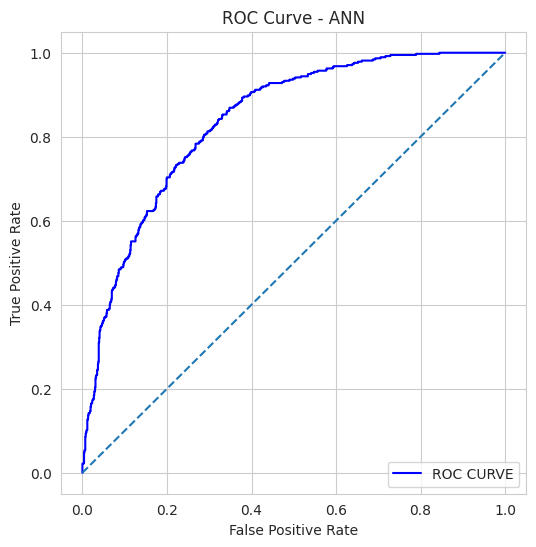

In [34]:
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,color='blue',label='ROC CURVE') 
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ANN")
plt.legend(loc="lower right")
plt.show()


In [35]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000,class_weight='balanced')
log_model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [36]:
y_pred = log_model.predict(x_test)

print(classification_report(y_test, y_pred))
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

Confusion matrix:  [[749 286]
 [ 81 293]]


In [37]:
print(log_model.score(x_train, y_train))
print(log_model.score(x_test, y_test))

0.7511537096201633
0.7395315826827538


In [38]:
# import necessary libraries

from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt 

# predicted probabilities for the positive class ( churn = 1) 
y_prob=log_model.predict_proba(x_test)[:,1]

#compute ROC curve 
fpr,tpr,thresholds=roc_curve(y_test,y_prob)

#compute AUC 
roc_auc=auc(fpr,tpr)

print('ROC - AUC VALUE :', roc_auc)

ROC - AUC VALUE : 0.8411454700457258


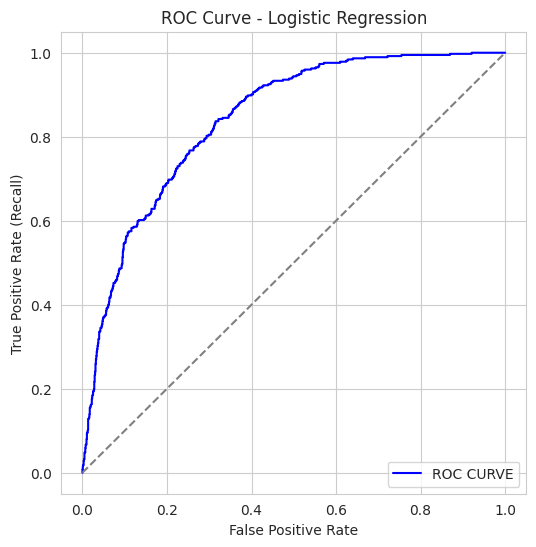

In [39]:
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,color='blue',label='ROC CURVE')   #plain label  no auc value 
plt.plot([0,1],[0,1],color='gray',linestyle='--')  #diagonal line 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [40]:
# Use Random Forest MODEL 
from sklearn.ensemble import RandomForestClassifier

#Build Model 
rf_model=RandomForestClassifier(

    n_estimators=500,        # number of trees
    max_depth=10,           
    min_samples_split=12,
    min_samples_leaf=10,
    class_weight='balanced_subsample', # important for churn imbalance
    random_state=42,
    n_jobs=-1


)

#Train 
rf_model.fit(x_train,y_train)


RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       min_samples_leaf=10, min_samples_split=12,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [41]:
y_pred=rf_model.predict(x_test)

#Evaluation 
print('Confusion matrix :', confusion_matrix(y_test,y_pred))
print('Classification report :',classification_report(y_test,y_pred))

Confusion matrix : [[790 245]
 [ 84 290]]
Classification report :               precision    recall  f1-score   support

           0       0.90      0.76      0.83      1035
           1       0.54      0.78      0.64       374

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409



In [42]:
# import necessary libraries

from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt 

# predicted probabilities for the positive class ( churn = 1) 
y_prob=rf_model.predict_proba(x_test)[:,1]

#compute ROC curve 
fpr,tpr,thresholds=roc_curve(y_test,y_prob)

#compute AUC 
roc_auc=auc(fpr,tpr)

print('ROC - AUC VALUE :', roc_auc)

ROC - AUC VALUE : 0.8445697383037537


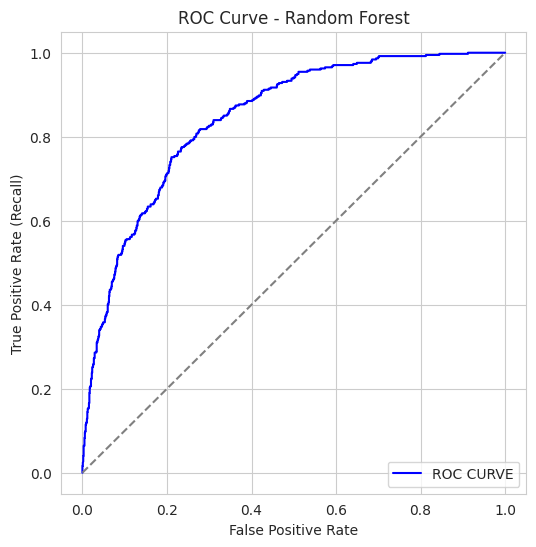

In [43]:
#plot the ROC curve 

plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,color='blue',label='ROC CURVE')   #plain label  no auc value 
plt.plot([0,1],[0,1],color='gray',linestyle='--')  #diagonal line 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

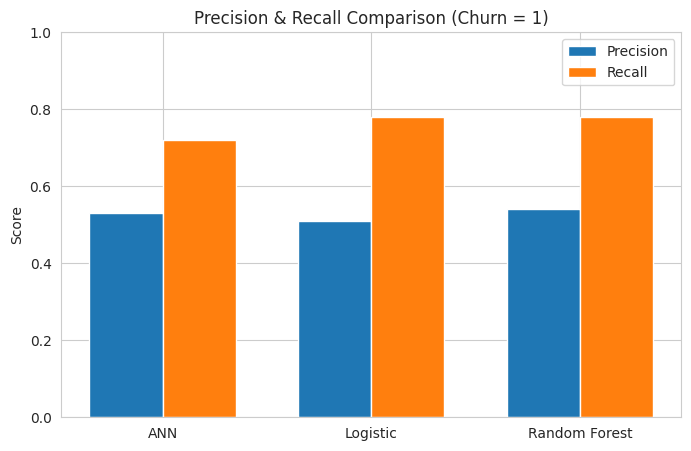

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['ANN', 'Logistic', 'Random Forest']

# Precision & Recall values (Churn = 1)
precision = [0.53, 0.51, 0.54]
recall = [0.72, 0.78, 0.78]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8,5))

plt.bar(x - width/2, precision, width, label='Precision')
plt.bar(x + width/2, recall, width, label='Recall')

plt.xticks(x, models)
plt.ylim(0,1)
plt.ylabel('Score')
plt.title('Precision & Recall Comparison (Churn = 1)')
plt.legend()

plt.show()
